# Add Folders to Path

In [1]:
%%time
import sys, os

# get current directory
path = os.getcwd()

# get parent directory
parent_directory = os.path.sep.join(path.split(os.path.sep)[:-3])

# add utils folder to current working path
sys.path.append(parent_directory+"/subfunctions/utils")

# add integration folder to current working path
sys.path.append(parent_directory+"/subfunctions/integration")

# add StochasticBarriers folder to current working path
sys.path.append(parent_directory+"/demos/StochasticBarriers")

Wall time: 0 ns


# Overview

We extract elliptic Lagrangian stochastic barriers in the Agulhas region from the AVISO dataset using the null geodesic identification scheme. All the results on diffusive scalar transport in a deterministic velocity field carry over automatically to particle transport in the stochastic velocity given by: 

\begin{equation}
d \mathbf{x}(t) = \mathbf{v}(\mathbf{x}(t), t)dt + \nu \mathbf{B}(\mathbf{x}(t), t)d\mathbf{W}(t),
\label{eq: ProbabilisticTransport}
\end{equation}

where $ \mathbf{x}(t) \in \mathbb{R}^n $ is the random position vector of a particle at time $ t $; $ \mathbf{v}(\mathbf{x}, t) $ denotes the incompressible, deterministic drift in the particle motion; and $ \mathbf{W}(t) $ is an m-dimensional Wiener process with diffusion matrix $ \nu \mathbf{B}(\mathbf{x}(t), t) $. Elliptic Lagrangian stochastic barriers are sharp barriers to particle transport under uncertainties in the velocity field. As higlighted in [1], for probabilistic diffusion barriers in the stochastic velocity field, we can apply the same procedure from the [Lagrangian diffusion barriers](http://localhost:8888/notebooks/TBarrier/2D/demos/DiffusionBarriers/EllipticLagrangianDiffusionBarriers/Main/EllipticLagrangianDiffusionBarriersAgulhas.ipynb) by setting:

\begin{equation}
\mathbf{D}(\mathbf{x}, t) = \dfrac{1}{2} \mathbf{B}(\mathbf{x}, t)\mathbf{B}(\mathbf{x}, t)^T
\end{equation}

The notebook is structured as follows:

1. Import data from the file 'AVISO.mat' stored in the folder 'data'
<br />
2. Define computational parameters (such as the number of cores) and variables
 <br />
3. Define spatio-temporal domain.
 <br />
4. Interpolate velocity from the (discrete) gridded data using a cubic spline interpolation
 <br />
5. Elliptic Lagrangian stochastic barriers (LSB):

    * Define diffusion matrix $ \mathbf{B}(\mathbf{x}(t), t) $:
    
    \begin{equation}
    \mathbf{B}(\mathbf{x}, t) = \begin{pmatrix} \sqrt{2} && 0 \\ 0 && \sqrt{2} \end{pmatrix}
    \end{equation}    
    
    and 
        
    \begin{equation}
    \mathbf{D}(\mathbf{x}, t) = \dfrac{1}{2}\mathbf{B}(\mathbf{x}, t)\mathbf{B}(\mathbf{x}, t)^T
    \end{equation}

    * Compute gradient of flow map $ \mathbf{\nabla F}_{t_0}^{t_N}(\mathbf{x}_0) $ over meshgrid using an auxiliary meshgrid. 
    <br />
    
    * Compute time-averaged diffusion Cauchy Green strain tensor as:
    
    \begin{equation} \mathbf{\overline{C}_D}_{t_0}^{t_N}(\mathbf{x}_0) = \dfrac{1}{t_N-t_0} \int_{t_0}^{t_N}[\mathbf{C}_D]_{t_0}^{t_N} dt = \dfrac{1}{t_N-t_0} \int_{t_0}^{t_N} det[\mathbf{D}(\mathbf{F}_{t_0}^t(\mathbf{x}_0), t)][\mathbf{T}_{t_0}^t(\mathbf{x}_0)]^{-1} dt, \end{equation} where $ \mathbf{T}_{t_0}^t(\mathbf{x}_0) = [\mathbf{\nabla_0 F_{t_0}^t}(\mathbf{x}_0)]^{-1}\mathbf{D}(\mathbf{F}_{t_0}^t(\mathbf{x}_0), t)\mathbf{\nabla_0 F_{t_0}^t}(\mathbf{x}_0)]^{-T} $ 
   
    <br />
    * Uniform transport barriers and enhancers satisfy
    
    \begin{equation}
    \langle \mathbf{x}_0', (\mathbf{\overline{C}_D}_{t_0}^{t_N}(\mathbf{x}_0)- \mathcal{T}_0 \mathbf{I})
    \mathbf{x}_0') = 0
    \end{equation}
    
    These are precisely null-geodesics of:
    
    \begin{equation}
    \mathbf{\hat{E}}_{\mathcal{T}_0}(\mathbf{x}_0) = \mathbf{\overline{C}}_d(\mathbf{x}_0)-
    \mathcal{T}_0\mathbf{I},
    \end{equation} on the spatial domain satisfying $ \overline{\lambda}_1 \leq \mathcal{T}_0 \leq
    \overline{\lambda}_2 $
    
    Elliptic Lagrangian diffusion barriers are closed null geodesics of the one-parameter family of Lorentzian
    metrics $ \mathrm{\overline{C}_{D}}_{t_0}^{t_N}(\mathbf{x}_0) − \mathcal{T}_0 I $. $ \mathcal{T}_0 $ equals to the uniform diffusive transport density across any material surface over the time-interval $
    [t_0, t_N] $.
    
    Elliptic Lagrangian diffusion barrierss are closed null geodesics of the one-parameter family of Lorentzian
    metrics:
    
    \begin{equation}
    \mathrm{A_{\mathcal{T}_0}(\mathbf{x}_0,t)} = \mathbf{\overline{C}_D}_{t_0}^{t_N}(\mathbf{x}_0) - \mathcal{T}_0\mathbf{I}
    \end{equation}
    
    We denote:
    \begin{equation}
    \mathbf{\overline{C}_D}_{t_0}^{t_N}(\mathbf{x}_0) = \begin{pmatrix} C_D^{11} && C_D^{12} \\ C_D^{12} && C_D^{22}\end{pmatrix}
    \end{equation}
    
    Closed null geodesics are closed curves of the system of ODE:
    
    \begin{align*}
    \dfrac{d \mathbf{x}}{ds} &= \mathbf{e}_{\phi}(s) = \begin{pmatrix} \cos(\phi(s)) \\ \sin(\phi(s)) \end{pmatrix} \\
    \dfrac{d \phi}{ds} &= - \dfrac{\langle \mathbf{e}_{\phi}(s), (\nabla_x A(\mathbf{x}) \mathbf{e}_{\phi}(s)) \mathbf{e}_{\phi}(s) \rangle}{2 \langle \mathbf{e}_{\phi}, R^T A(\mathbf{x}) \mathbf{e}_{\phi}(s)}, 
    \end{align*} where $ R = \begin{pmatrix} 0 && -1 \\ 1 && 0\end{pmatrix} $.
    
    $  \dfrac{d \phi}{ds} $ depends both on $ \mathbf{x} $ and on $ \phi $ and can be evaluated through interpolation by first computing $ \nabla_x \mathbf{A}(\mathbf{x}) = \nabla_x \mathbf{\overline{C}_D}_{t_0}^{t_N}(\mathbf{x}) $ over the meshgrid. 
    <br />
    It holds:
    \begin{equation}
    \dfrac{d \phi}{ds} = - \dfrac{\cos^2(\phi)[{C_D}_x^{11}(\mathbf{x})\cos(\phi)+{C_D}_y^{11}(\mathbf{x})\sin(\phi)]+[{C_D}_x^{12}(\mathbf{x})\cos(\phi)+{C_D}_y^{11}(\mathbf{x})\sin(\phi)]\sin(2\phi)+\sin^2(\phi)[{C_D}_x^{22}(\mathbf{x})\cos(\phi)+{C_D}_y^{22}(\mathbf{x})\sin(\phi)}{\sin(2\phi)[C_D^{22}(\mathbf{x})-C_D^{11}(\mathbf{x})]+2\cos(2\phi)C_D^{12}(\mathbf{x})}
    \end{equation}
    
    The set of initial conditions is given by:
    \begin{equation}
    (\mathbf{x}_0, \phi_0)_{\mathcal{T}_0} = \lbrace (\mathbf{x}_0(\mathcal{T}_0, \phi = 0), 0) \in V: C_D^{11}(\mathbf{x}, t)- \mathcal{T}_0 = 0 \rbrace
    \end{equation}
    
    Furthermore the domain of existence of the ODE is restricted to points $ \mathbf{x}, \phi $ where:
    
    \begin{equation}
    \sin(2\phi)[C_D^{22}(\mathbf{x})-C_D^{11}(\mathbf{x})]+2\cos(2\phi)C_D^{12}(\mathbf{x}) \neq 0
    \end{equation}
    
6. Lagrangian stochastic simulation:

    * In order to verify that the ring boundaries (computed from the deterministic velocity field) in step [5] act as sharp barriers to particle transport under uncertainties we perfom a Monte-Carlo simulation of eq. \ref{eq: ProbabilisticTransport} in the Lagrangian frame:
    
    \begin{equation}
    d \mathbf{x}_0(t) = \nu \mathbf{B}_0(\mathbf{x}(t), t) d\mathbf{W}(t), \quad \mathbf{B}_0(\mathbf{x}(t), t) = \mathbf{\nabla F_{t_0}^t}^{-1} \mathbf{B}(\mathbf{x}(t), t)
    \label{eq: LagrangianProbabilisticTransport}
    \end{equation}
    <br />
    * First we find the outermost elliptic stochastic barriers within each family of elliptic SDB computed in step [5].
    <br />
    * Then we seed inside the outermost elliptic stochastic barriers particles and advect them using equation \ref{eq: LagrangianProbabilisticTransport} over the time-interval $ [t_0, t_N] $.

# Import Data

We start by import the AVISO-data from the file 'AVISO.mat' stored in the folder 'Data'.

In [2]:
%%time
import scipy.io as sio

#Import velocity data from file in data-folder
mat_file = sio.loadmat('../../../data/Aviso/AVISO.mat')

U = mat_file['u']
V = mat_file['v']
x = mat_file['x']
y = mat_file['y']
time_data = mat_file['t']

Wall time: 112 ms


# Computational parameters and data

Here we define the computational parameters and the data.

In [3]:
import numpy as np

# number of cores to be used for parallel computing
Ncores = 5

# time resolution of data
dt_data = time_data[0,1]-time_data[0,0]

# periodic boundary conditions
periodic_x = False
periodic_y = False
periodic = [periodic_x, periodic_y]

# unsteady velocity field
bool_unsteady = True

# defined domain
# This array denotes where the velocity field is defined (=1) and where it is not defined (=0)
defined_domain = np.isfinite(U[:,:,0]).astype(int)

## meshgrid
X, Y = np.meshgrid(x, y)

## resolution of meshgrid
dx_data = X[0,1]-X[0,0]
dy_data = Y[1,0]-Y[0,0]

delta = [dx_data, dy_data]

# Spatio-temporal domain

Here we define the spatio-temporal domain over which to consider the dynamical system.

In [4]:
%%time
# Initial time (in days)
t0 = 0

# Final time (in days)
tN = 10

# time step-size
dt = .1

# Time resolution: N = len(time)
time = np.arange(t0, tN+dt, dt)

# length of time interval (in days)
lenT = tN-t0

# domain boundary (in degrees)
xmin = -3
xmax = 1
ymin = -32
ymax = -28

# make sure that the spatio-temporal you defined are within the domain of the data
assert (xmax <= np.max(X) and xmin >= np.min(X) and ymin >= np.min(Y) and ymax <= np.max(Y) and np.min(time_data) <= t0 <= np.max(time_data) and tN <= np.max(time_data)),"The domains you are chooising are outside the domain of the data!!!!! --> redefine spatial/temporal domain"

# spacing of meshgrid (in degrees)
dx = 0.05
dy = 0.05

# NOTE: As we are computing spatial derivatives of the CG-tensor, the spacing of the meshgrid has to be sufficiently small.
# However, choosing dx to be too small leads to (unnecessary) long computation times.

x_domain = np.arange(xmin, xmax + dx, dx)
y_domain = np.arange(ymin, ymax + dy, dy)

X_domain, Y_domain = np.meshgrid(x_domain, y_domain)

Wall time: 967 µs


# Interpolate Velocity

In order to evaluate the velocity field at arbitrary locations and times, we interpolate the discrete velocity data. The interpolation with respect to time is always linear. The interpolation with respect to space can be chosen to be "cubic" or "linear".

In [5]:
%%time
# Import interpolation function for unsteady flow field
from ipynb.fs.defs.Interpolant import interpolant_unsteady

# set nan values to zero so that we can apply interpolant. Interpolant does not work if the array contains nan values
U[np.isnan(U)] = 0
V[np.isnan(V)] = 0

# Interpolate velocity data using cubic spatial interpolation
Interpolant = interpolant_unsteady(X, Y, U, V, time_data)

Wall time: 69.8 ms


# Elliptic Lagrangian stochastic barriers (LSB)

##  Time averaged diffusion Cauchy Green (CG) strain tensor

Next, we compute the time-averaged diffusion Cauchy Green strain tensor $ \mathrm{\overline{C}_{D}}_{t_0}^{t_N}(\mathbf{x}_0) $ over the time-interval $ [t_0, t_N] $ by iterating over a meshgrid (parallelized). 'aux_grid' specifies the ratio between the auxiliary grid and the original meshgrid when computing spatial derivatives. This parameter is generally chosen to be between $ [\dfrac{1}{5}, \dfrac{1}{10}] $.

In [6]:
%%time
# Import package for progress bar
from tqdm.notebook import tqdm

# Import package for parallel computing
from joblib import Parallel, delayed

# Import gradient of velocity function
from ipynb.fs.defs.gradient_flowmap import gradient_flowmap

# Import package for computing trajectories/velocity
from ipynb.fs.defs.integration_dFdt import integration_dFdt

# Import Rate of Strain function
from ipynb.fs.defs.DiffusionCauchyGreen import DiffusionCauchyGreen

# Import package which checks particle location
from ipynb.fs.defs.check_location import check_location

# Import RegularGridInterpolator
from scipy.interpolate import RegularGridInterpolator

# Define ratio of auxiliary grid spacing vs original grid_spacing
aux_grid_ratio = .2 # [1/5, 1/10]
aux_grid = [aux_grid_ratio*(X_domain[0, 1]-X_domain[0, 0]), aux_grid_ratio*(Y_domain[1, 0]-Y_domain[0, 0])]

# number of diffusive Cauchy Green strain tensor used for averaging
n_averaging = 10

# Components of diffusivity tensor D11, D12, D22 over spatial meshgrid and time have shape (Ny, Nx, N)
# , where Ny/Nx are the spatial resolution in the lat/long coordinates
# and N the time-resolution of the data
D11_field = np.zeros((X.shape[0], Y.shape[1], time_data.shape[1]))
D12_field = np.zeros((X.shape[0], Y.shape[1], time_data.shape[1]))
D22_field = np.zeros((X.shape[0], Y.shape[1], time_data.shape[1]))

# Diffusion matrix D = 1/2*BB^Twe set it to be constant in space and time 
# but it can generally be spatially and temporally varying).
B11 = np.sqrt(2)
B12 = 0
B21 = 0
B22 = np.sqrt(2)

# D = 1/2*B*B^T
D11_field[:,:,:] = 1/2*(B11**2+B12**2)
D12_field[:,:,:] = 1/2*(B11*B12+B22*B12)
D22_field[:,:,:] = 1/2*(B12**2+B22**2)

# Interpolate D11_field/D12_field/D22_field over spatial and temporal domain
Interpolant_D11 = RegularGridInterpolator((Y[:,0], X[0,:], time_data[0,:]), D11_field)
Interpolant_D12 = RegularGridInterpolator((Y[:,0], X[0,:], time_data[0,:]), D12_field)
Interpolant_D22 = RegularGridInterpolator((Y[:,0], X[0,:], time_data[0,:]), D22_field)

def parallel_CD(i):
    
    CD_parallel = np.zeros((X_domain.shape[1], 2, 2))*np.nan
    
    for j in range(CD_parallel.shape[0]):
        
        x = np.array([X_domain[i,j], Y_domain[i,j]])
        
        # only compute CG tensor for particles in region where velocity field is defined
        if check_location(X, Y, defined_domain, x)[0] == "IN":
        
            # compute trajectory
            Fmap = integration_dFdt(time, x, X, Y, Interpolant, periodic, defined_domain, bool_unsteady, dt_data, delta)[0]
        
            # Compute gradient of flowmap
            gradFmap = gradient_flowmap(time, x, X, Y, Interpolant, periodic, defined_domain, bool_unsteady, dt_data, delta, aux_grid)
        
            # Compute diffusion averaged CG tensor
            CD_parallel[j, :, :] = DiffusionCauchyGreen(Interpolant_D11, Interpolant_D12, Interpolant_D22, time, Fmap, gradFmap, lenT, n_averaging)
    
    return CD_parallel

CD = np.array(Parallel(n_jobs=Ncores, verbose = 0)(delayed(parallel_CD)(i) for i in tqdm(range(X_domain.shape[0]))))

  0%|          | 0/82 [00:00<?, ?it/s]

Wall time: 56 s


## Compute tensorfield

In [7]:
# Import RectBivariateSpline from scipy
from scipy.interpolate import RectBivariateSpline as RBS
        
# Compute gradients of elements of rate of strain tensor

# Initialize array
CD11 = np.nan_to_num(CD[:,:,0,0], nan=0.0)
CD12 = np.nan_to_num(CD[:,:,0,1], nan=0.0)
CD22 = np.nan_to_num(CD[:,:,1,1], nan=0.0)
    
# Interpolate elements of rate of strain tensor (per default: cubic)
interp_CD11 = RBS(Y_domain[:,0], X_domain[0,:], CD11)
interp_CD12 = RBS(Y_domain[:,0], X_domain[0,:], CD12)
interp_CD22 = RBS(Y_domain[:,0], X_domain[0,:], CD22)

# Compute elements of CG tensor
CD11 = CD[:,:,0,0].copy()
CD12 = CD[:,:,0,1].copy()
CD22 = CD[:,:,1,1].copy()
    
# Interpolate elements of CG tensor (per default: linear)
interp_CD11 = RBS(Y_domain[:,0], X_domain[0,:], np.nan_to_num(CD11, nan=0.0), kx = 3, ky = 3)
interp_CD12 = RBS(Y_domain[:,0], X_domain[0,:], np.nan_to_num(CD12, nan=0.0), kx = 3, ky = 3)
interp_CD22 = RBS(Y_domain[:,0], X_domain[0,:], np.nan_to_num(CD22, nan=0.0), kx = 3, ky = 3)

# Initialize arrays
CD11x = np.zeros((CD.shape[0], CD.shape[1]))*np.nan
CD11y = np.zeros((CD.shape[0], CD.shape[1]))*np.nan
CD12x = np.zeros((CD.shape[0], CD.shape[1]))*np.nan
CD12y = np.zeros((CD.shape[0], CD.shape[1]))*np.nan
CD22x = np.zeros((CD.shape[0], CD.shape[1]))*np.nan
CD22y = np.zeros((CD.shape[0], CD.shape[1]))*np.nan
    
# Define auxilary meshgrid
rho_x = aux_grid[0]
rho_y = aux_grid[1]
        
#iterate over meshgrid
for i in range(X_domain.shape[0]):
        
    for j in range(Y_domain.shape[1]):
            
        x = [X_domain[i,j], Y_domain[i, j]]
        
        # compute derivatives using auxiliary grid and finite-differencing
        CD11x[i, j] = (interp_CD11(x[1], x[0]+rho_x)[0][0]-interp_CD11(x[1], x[0]-rho_x)[0][0])/(2*rho_x)
        CD11y[i, j] = (interp_CD11(x[1]+rho_y, x[0])[0][0]-interp_CD11(x[1]-rho_y, x[0])[0][0])/(2*rho_y)
        
        CD12x[i, j] = (interp_CD12(x[1], x[0]+rho_x)[0][0]-interp_CD12(x[1], x[0]-rho_x)[0][0])/(2*rho_x)
        CD12y[i, j] = (interp_CD12(x[1]+rho_y, x[0])[0][0]-interp_CD12(x[1]-rho_y, x[0])[0][0])/(2*rho_y)
            
        CD22x[i, j] = (interp_CD22(x[1], x[0]+rho_x)[0][0]-interp_CD22(x[1], x[0]-rho_x)[0][0])/(2*rho_x)
        CD22y[i, j] = (interp_CD22(x[1]+rho_y, x[0])[0][0]-interp_CD22(x[1]-rho_y, x[0])[0][0])/(2*rho_y)

## Interpolate $ \dot{\phi}(x, y, \phi)$ 

In [8]:
%%time
from ipynb.fs.defs.phi_prime import _phi_prime

# Interpolant phi_phrime, interpolant indicating domain of existence (= denominator of phi_prime)
interp_phi_prime, interp_DOE = _phi_prime(X_domain, Y_domain, CD11, CD12, CD22, CD11x, CD11y, CD12x, CD12y, CD22x, CD22y)

Wall time: 1.52 s


## Compute elliptic Lagrangian stochastic barriers

In [9]:
%%time
# import plotting library
import matplotlib.pyplot as plt
import matplotlib as mpl

# Import function to extract closed null geodesics
from ipynb.fs.defs.closed_null_geodesics import closed_null_geodesics

# extract elliptic SB from closed null geodesics
from ipynb.fs.defs.elliptic_SB import elliptic_SB

# define T0 range
T0_min = .8
T0_max = 1.2
n_T0 = 11
T0_range = np.linspace(T0_min, T0_max, n_T0)

# threshold distance between starting and return point of trajectory
d_threshold = 2*dx

# compute elliptic SB
def compute_elliptic_SB(T0):
    
    # Define list storing x, y coordinates of elliptic LCS
    x_elliptic, y_elliptic = [], []
    
    # Find all closed null geodesics
    closed_NG, init_T0 = closed_null_geodesics(X_domain, Y_domain, T0, interp_phi_prime, d_threshold, CD11, interp_DOE)
    
    x_elliptic, y_elliptic = [], []
    # iterate over all geodesics
    for NG in closed_NG:
        
        if np.sum(NG[0]) is not None:
            
            x = NG[0]
            y = NG[1]
            x = np.append(x, x[0])
            y = np.append(y, y[0])
            
            x_elliptic.append(x)
            y_elliptic.append(y)
        
    return [x_elliptic, y_elliptic, init_T0]
        
# compute elliptic SB with parallel computing
Elliptic_SB = Parallel(n_jobs=Ncores, verbose = 0)(delayed(compute_elliptic_SB)(i) for i in T0_range)

Wall time: 13.9 s


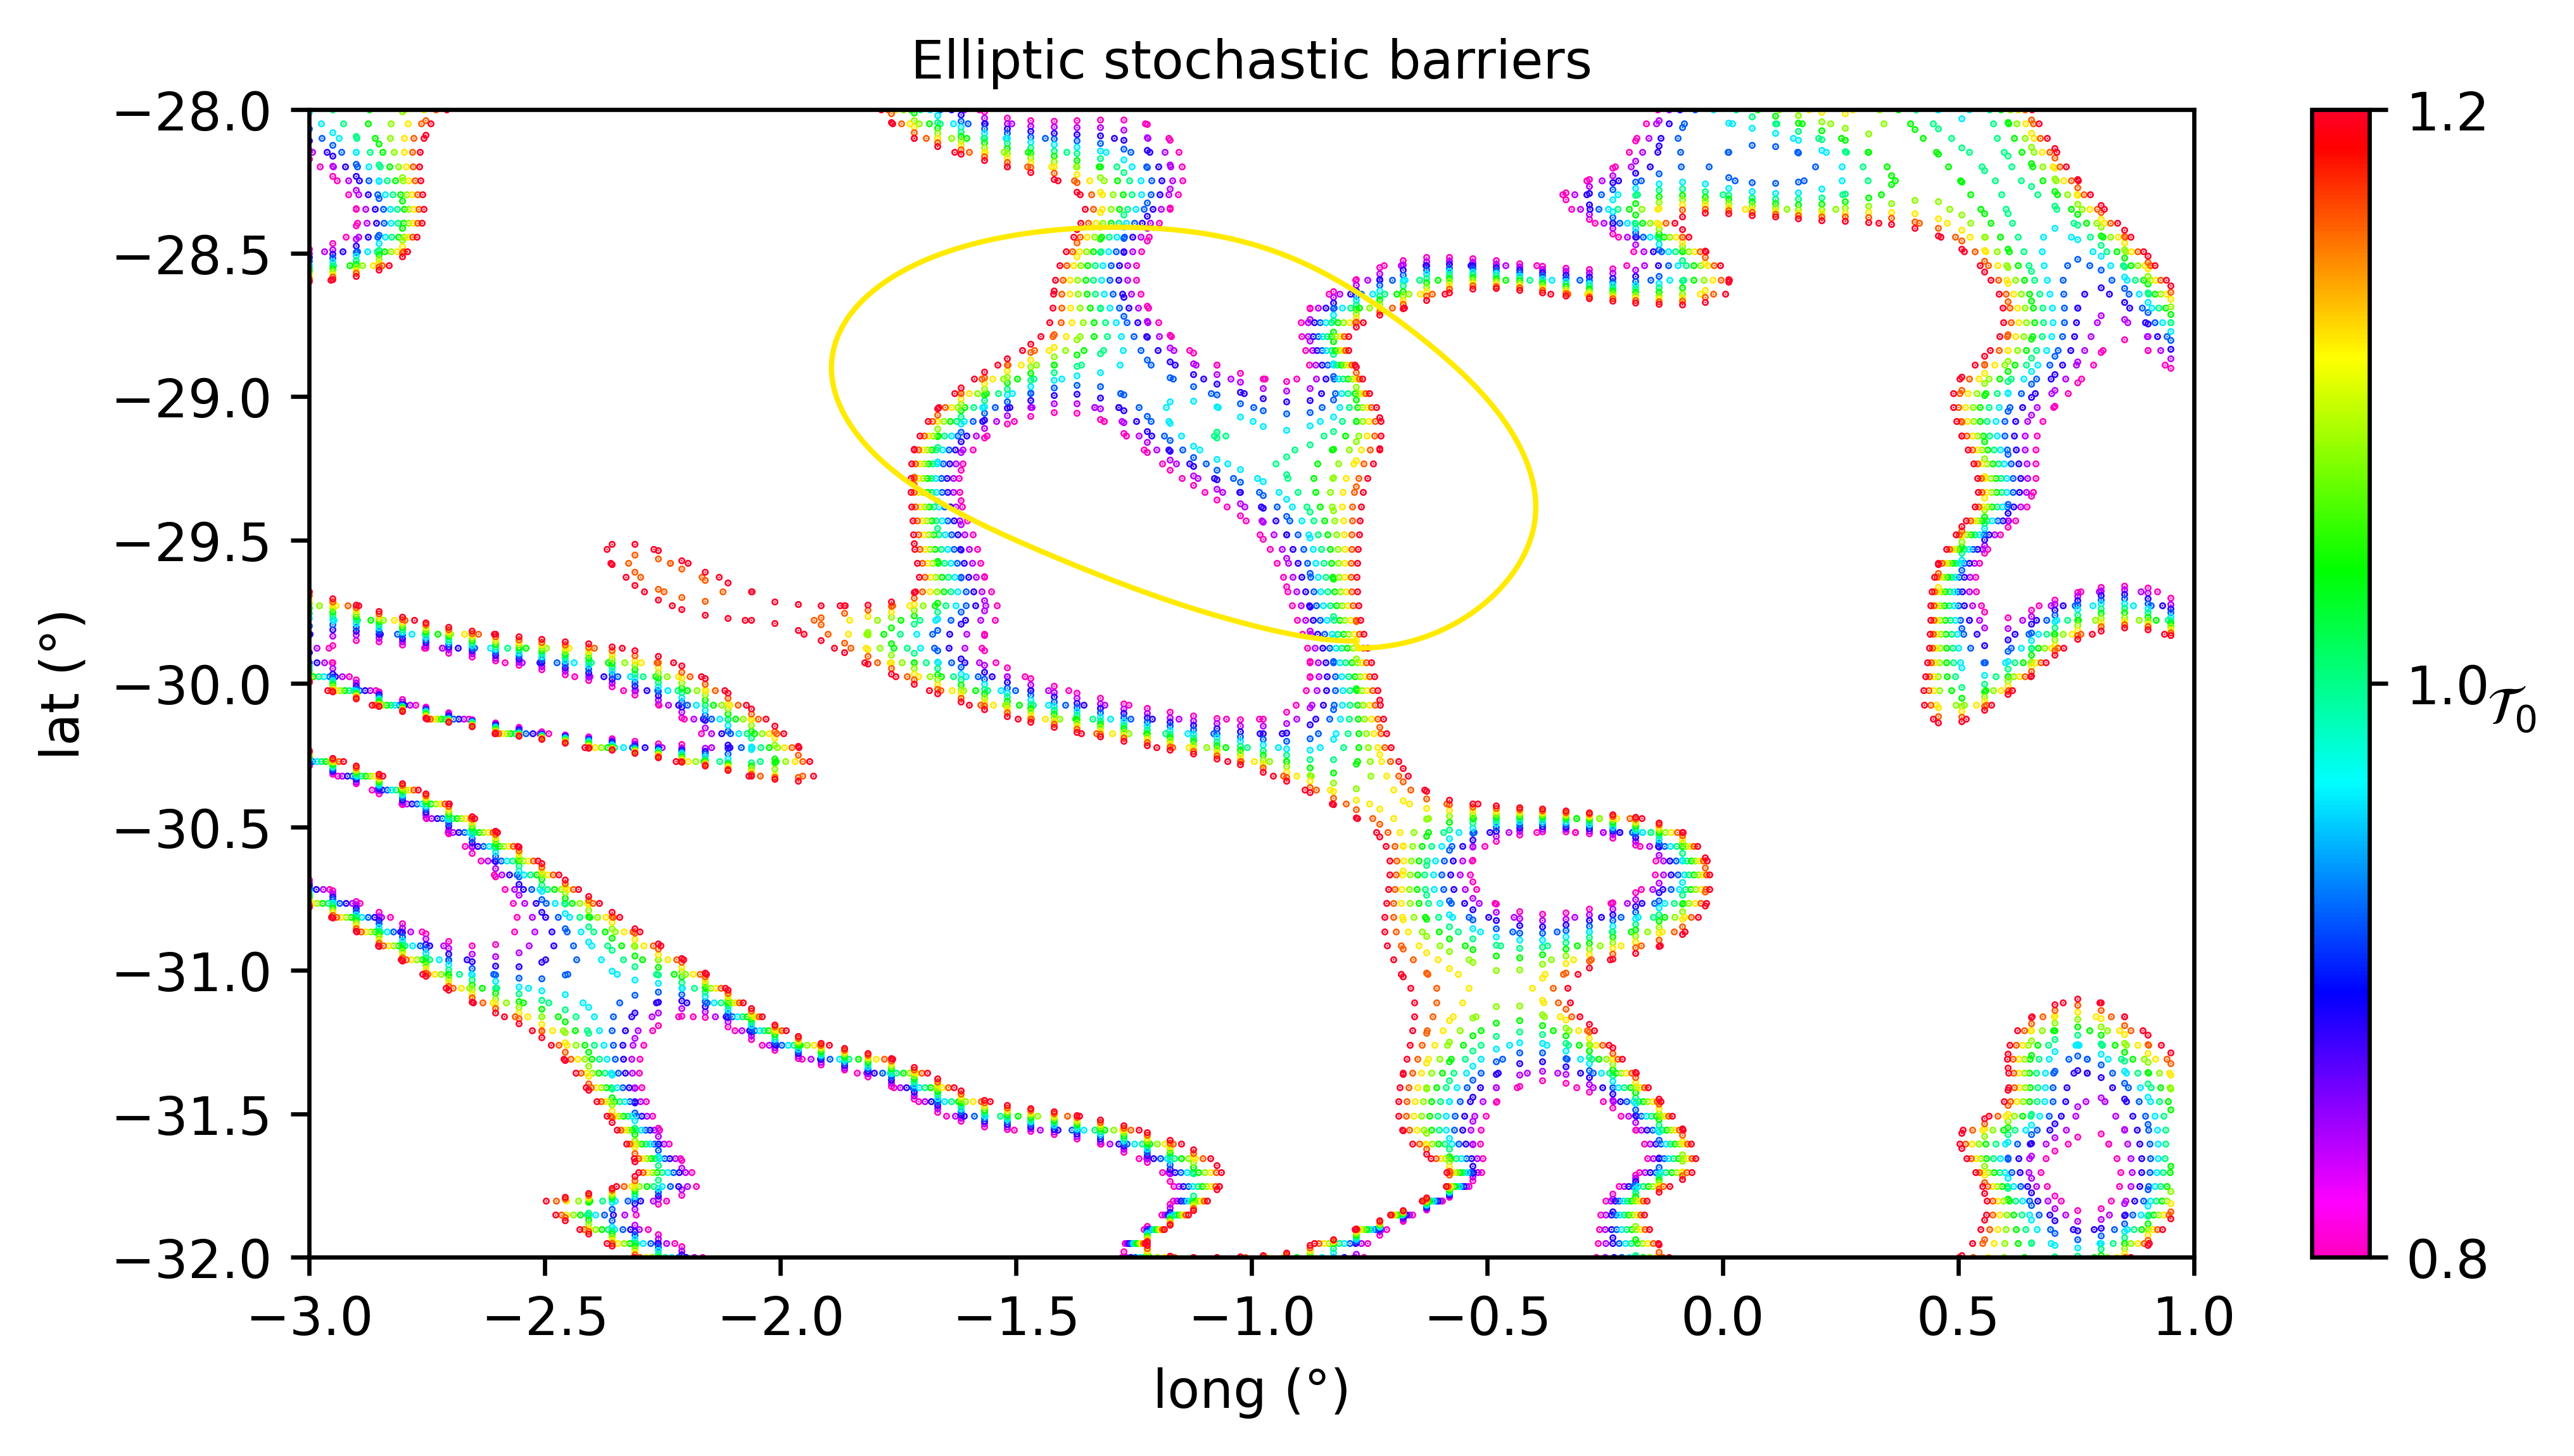

Wall time: 1 s


In [10]:
%%time
######################################## Plot elliptic SB ########################################

# import plotting library
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define figure/axes
fig = plt.figure(figsize = (8, 4), dpi = 600)
ax = plt.axes()

# Define norm/cmap
norm = mpl.colors.Normalize(vmin=T0_range.min(), vmax=T0_range.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='gist_rainbow_r')

# Iterate over all elliptic SB and plot
for i in range(len(Elliptic_SB)):
    
    # Plot initial conditions
    ax.scatter(Elliptic_SB[i][2][0], Elliptic_SB[i][2][1], color=cmap.to_rgba(T0_range[i]), s = 0.1)
    
    # Plot elliptic SB
    if Elliptic_SB[i][0] is not None:
        for j in range(len(Elliptic_SB[i][0])):
            if Elliptic_SB[i][0][j] is not None:
                ax.plot(Elliptic_SB[i][0][j], Elliptic_SB[i][1][j], c=cmap.to_rgba(T0_range[i]), linewidth = 1)

# Set axis limits
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

# Set axis labels
ax.set_xlabel("long (°)", fontsize = 10)
ax.set_ylabel("lat (°)", fontsize = 10)

# Colorbar
cbar = fig.colorbar(cmap, ticks=[T0_range.min(), 1, T0_range.max()])
cbar.ax.set_ylabel(r'$ \mathcal{T}_0 $', rotation = 0, fontsize = 10)

# Title
ax.set_title("Elliptic stochastic barriers", fontsize = 10)
plt.show();

The colored (closed) curves indicate elliptic Lagrangian diffusion barriers with constant transport density $ \mathcal{T}_0 $. The colored dots indicate the initial conditions depending on $ \mathcal{T}_0 $.

# Lagrangian stochastic simulation

We proceed by extracting the outermost elliptic barriers computed in step [5]. We then seed particles inside those barriers and advect them according to equation \ref{eq: LagrangianProbabilisticTransport}

## Find outermost closed curve for each family of elliptic Lagrangian stochastic barriers

We now seek to find the outermost elliptic SDB within each family of SDBs.

In [11]:
# import function which extracts outermost elliptic SB for each family of elliptic SB
from ipynb.fs.defs.find_outermost_closed_curve import find_outermost_closed_curve

# find outermost elliptic SB in each family of elliptic SB
x_outermost_elliptic_SB, y_outermost_elliptic_SB, T0_outermost_elliptic_SB = find_outermost_closed_curve(Elliptic_SB, T0_range)

## Compute stochastic trajectories in Lagrangian frame

### Define function which computes stochastic trajectories

In [12]:
# import package for stochastic differential equations
import sdeint

# import spline interpolation for 1D
from scipy.interpolate import InterpolatedUnivariateSpline

# Import shapely library to create polygons and points
from shapely.geometry import Polygon, Point

def stochastic_trajectories(x0batch, y0batch):
    
    # closure function. This is just a dummy function needed to pass arguments to sdeint.
    def close(func, *args):
        def newfunc(x, t):
            return func(x, t, *args)
        return newfunc
    
    # drift term of ODE
    def f(x, t, gradFmap11, gradFmap12, gradFmap21, gradFmap22, B, nu):
        return np.array([0, 0])

    # stochastic term of ODE
    def G(x, t, gradFmap11, gradFmap12, gradFmap21, gradFmap22, B, nu):
                    
        gFmap11 = gradFmap11(t)
        gFmap12 = gradFmap12(t)
        gFmap21 = gradFmap21(t)
        gFmap22 = gradFmap22(t)
        
        inverse_gradFmap = 1/(gFmap11*gFmap22-gFmap12*gFmap21)*np.array([[gFmap22, -gFmap12], [-gFmap21, gFmap11]])
        
        B0 = np.sqrt(nu)*inverse_gradFmap@B
                    
        return B0
    
    x_stochastic, y_stochastic = [], []
    
    print("")
    
    # Iterate over all initial conditions
    for j in tqdm(range(len(x0batch))):
                
        x0 = np.array([x0batch[j], y0batch[j]])
                
        # Compute gradient of flowmap
        gradFmap = gradient_flowmap(time, x0, X, Y, Interpolant, periodic, defined_domain, bool_unsteady, dt_data, delta, aux_grid)
                    
        gradFmap11 = InterpolatedUnivariateSpline(time, gradFmap[0,0,:])
        gradFmap12 = InterpolatedUnivariateSpline(time, gradFmap[0,1,:])
        gradFmap21 = InterpolatedUnivariateSpline(time, gradFmap[1,0,:])
        gradFmap22 = InterpolatedUnivariateSpline(time, gradFmap[1,1,:])
        
        if np.isfinite(np.sum(gradFmap[:,:,:].ravel())):
            args = (gradFmap11, gradFmap12, gradFmap21, gradFmap22, B, nu)
            result = sdeint.stratSRS2(close(f, *args), close(G, *args), x0, time)
            x_stochastic.append(result[:,0])
            y_stochastic.append(result[:,1])
                
        else:
                
            x_stochastic.append(np.zeros((len(time), ))*np.nan)
            y_stochastic.append(np.zeros((len(time), ))*np.nan)
    
    return x_stochastic, y_stochastic

### Compute stochastic trajectories

In [ ]:
# define B
B = np.array([[B11, B12], [B21, B22]])

# define \nu
nu = 10**(-5)

x0_stochastic, y0_stochastic = [], []
x_shifted, y_shifted = [], []
c = []

# compute initial conditions for particles inside elliptic stochastic barrier and shifted version of elliptic_SD
for b in range(len(x_outermost_elliptic_SB)):
    
    Poly_object = Polygon(zip(x_outermost_elliptic_SB[b], y_outermost_elliptic_SB[b]))
    
    # shifte copy of outermost elliptic SB
    x_shifted.append(x_outermost_elliptic_SB[b]+3)
    y_shifted.append(y_outermost_elliptic_SB[b])
    
    for xi in np.arange(xmin, xmax, 0.05):
        
        for yi in np.arange(ymin, ymax, 0.05):
            
            if Poly_object.contains(Point(xi, yi)):
                
                # particles inside elliptic SBf
                for _ in range(4):
                    
                    x0_stochastic.append(xi)
                    y0_stochastic.append(yi)
                    c.append(1)
                
                # particles inside shifted version elliptic SB (shifted by +3 in the x-direction)
                for _ in range(4):
                    
                    x0_stochastic.append(xi+3)
                    y0_stochastic.append(yi)
                    c.append(0)

    
                    
# split initial conditions into batches for parallel computing
x0_batch = [list(x0_stochastic[i:i+int(len(x0_stochastic)/Ncores)]) for i in range(len(x0_stochastic))[::int(len(x0_stochastic)/Ncores)]]
y0_batch = [list(y0_stochastic[i:i+int(len(y0_stochastic)/Ncores)]) for i in range(len(y0_stochastic))[::int(len(y0_stochastic)/Ncores)]]
                    
# compute stochastic particle trajectories inside outermost elliptic SB
Stochastic_trajectories = Parallel(n_jobs=Ncores)(delayed(stochastic_trajectories)(x0_batch[i], y0_batch[i]) for i in range(len(x0_batch)))


### Lagrangian stochastic simulation

In [ ]:
####################################### Lagrangian stochastic simulation (animation) #######################################

# import animation library
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

# transform stochastic trajectories from list object to a 2D array
x_traj = []
y_traj = []
for traj in Stochastic_trajectories:
    for idx in range(len(traj[0])):
        x_traj.append(traj[0][idx])
        y_traj.append(traj[1][idx])
        
x_traj = np.array(x_traj)
y_traj = np.array(y_traj)
c = np.array(c)

# initialize figure
fig = plt.figure(figsize = (8, 4), dpi = 300)
ax = plt.axes()

# Set axis limits
ax.set_xlim([np.min(x_traj[:,0])-2, np.max(x_traj[:,0])+2])
ax.set_ylim([np.min(y_traj[:,0])-2, np.max(y_traj[:,0])+2])

# Set axis labels
ax.set_xlabel("long (°)", fontsize = 10)
ax.set_ylabel("lat (°)", fontsize = 10)

# plot vortex boundaries
for i in range(len(x_outermost_elliptic_SB)):
    line, = ax.plot(x_outermost_elliptic_SB[i], y_outermost_elliptic_SB[i], c = "k", linewidth = 2)
    
# plot random closed curves
for i in range(len(x_shifted)):
    line, = ax.plot(x_shifted[i], y_shifted[i], c = "k", linewidth = 2)
    
# initialize plot
scat = ax.scatter([], [])

label = ax.text(-1.5, -27, "Elapsed time: " + np.str(np.around(time[0], 2)) + "d", ha='center', va='center', fontsize=20, color="Red")

def animate(frame):
    
    if frame % 10 == 0:
        print("Percentage completed: ", int(5*100*frame/len(time)))
    
    # update plot
    scat.set_offsets(np.column_stack([x_traj[:,5*frame].ravel(), y_traj[:,5*frame].ravel()]))
    scat.set_sizes(np.ones((c.shape[0], ))) # add size
    scat.set_array(c) # add colors
    label.set_text("Elapsed time: " + np.str(np.around(time[5*frame], 2)) + "d")
anim = FuncAnimation(fig, animate, frames = int(len(time)/5), interval = 40, blit=False)
video = anim.to_html5_video()
html = display.HTML(anim.to_jshtml())
display.display(html)
plt.close()

The above figure displays the final positions of stochastic trajectories in the Lagrangian frame, initialized from the interors of the closed black lines.

The trajectories released from inside the elliptic Lagrangian stochastic barriers (yellow) remain confined within the stochastic barriers throught the time-interval $ [t_0, t_N] $. Trajectories released from a shifted version of the elliptic stochastic barriers (black) are not confined to remain within the closed curve. 

# References

[1] Haller, G., Karrasch, D., & Kogelbauer, F. (2018). Material barriers to diffusive and stochastic transport. Proceedings of the National Academy of Sciences, 115(37), 9074-9079.